In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "worldmovers" # username from the json file
os.environ['KAGGLE_KEY'] = "7ac0d20dba0fcc776203b693bc74c3f9" # key from the json file

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=d810be6a92b97691c80da79db3ee5c88b2a03919d481d8e002e1affc3e93e0c6
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:12<00:00, 48.0MB/s]
100% 812M/812M [00:12<00:00, 69.1MB/s]


In [5]:
!ls

dogs-vs-cats.zip  sample_data  sampleSubmission.csv  test1.zip	train.zip


In [4]:
%%bash
unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [6]:
%%bash
unzip test1.zip
unzip train.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

In [0]:
!ls 

sample_data	      test1	 tfrecords  train.zip
sampleSubmission.csv  test1.zip  train


In [7]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

TensorFlow 2.x selected.


In [0]:
filename = os.listdir('train')

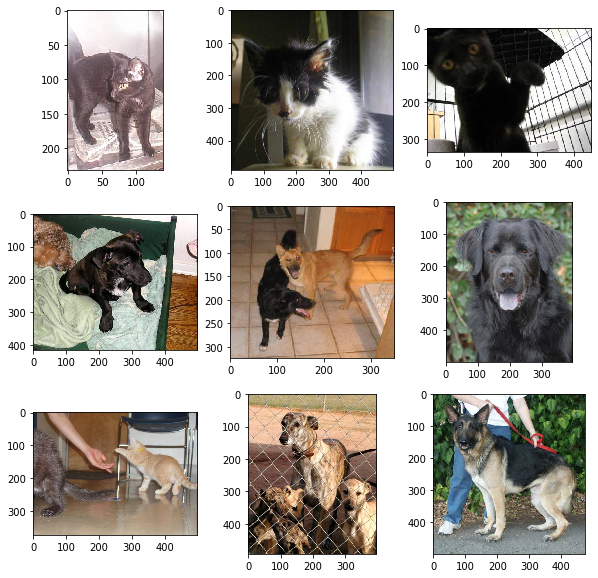

In [9]:
plt.figure(figsize=(10,10))
for i, path in enumerate(filename[:9],start=1):
    img = tf.keras.preprocessing.image.load_img('/content/train/'+path)
    plt.subplot(3,3,i)
    plt.imshow(img)
plt.show()


## Spliting Data into Train and Validation

In [10]:
train_class ={}
for i in filename:
  spl = i.split('.')
  if spl[0]=='cat':
    label=0
  else :
    label=1
  train_class[i]=label
print(train_class)

{'cat.2189.jpg': 0, 'cat.4579.jpg': 0, 'cat.5154.jpg': 0, 'dog.828.jpg': 1, 'dog.6892.jpg': 1, 'dog.10329.jpg': 1, 'cat.10716.jpg': 0, 'dog.12090.jpg': 1, 'dog.4567.jpg': 1, 'cat.3900.jpg': 0, 'cat.10107.jpg': 0, 'cat.10381.jpg': 0, 'cat.5465.jpg': 0, 'dog.5261.jpg': 1, 'cat.5556.jpg': 0, 'cat.9548.jpg': 0, 'cat.6869.jpg': 0, 'dog.4884.jpg': 1, 'dog.168.jpg': 1, 'dog.4720.jpg': 1, 'dog.8133.jpg': 1, 'dog.7457.jpg': 1, 'dog.11242.jpg': 1, 'dog.5112.jpg': 1, 'dog.11502.jpg': 1, 'dog.11351.jpg': 1, 'cat.11320.jpg': 0, 'cat.12285.jpg': 0, 'cat.6124.jpg': 0, 'dog.2979.jpg': 1, 'cat.1147.jpg': 0, 'cat.6141.jpg': 0, 'dog.8526.jpg': 1, 'cat.5566.jpg': 0, 'dog.5588.jpg': 1, 'dog.8779.jpg': 1, 'cat.4975.jpg': 0, 'dog.2040.jpg': 1, 'dog.12463.jpg': 1, 'cat.2310.jpg': 0, 'cat.6129.jpg': 0, 'dog.7872.jpg': 1, 'dog.3756.jpg': 1, 'cat.12075.jpg': 0, 'dog.8423.jpg': 1, 'cat.10703.jpg': 0, 'dog.609.jpg': 1, 'cat.1472.jpg': 0, 'dog.10442.jpg': 1, 'cat.7152.jpg': 0, 'cat.6693.jpg': 0, 'dog.7521.jpg': 1, 

In [11]:
len(train_class)

25000

In [12]:
train_list = list(train_class.items())[:20000]
len(train_list)

20000

In [13]:
validation_list = list(train_class.items())[20000:]
len(validation_list)

5000

In [14]:
train_data_dict = dict(train_list)
print(len(train_data_dict))
print(train_data_dict)

20000
{'cat.2189.jpg': 0, 'cat.4579.jpg': 0, 'cat.5154.jpg': 0, 'dog.828.jpg': 1, 'dog.6892.jpg': 1, 'dog.10329.jpg': 1, 'cat.10716.jpg': 0, 'dog.12090.jpg': 1, 'dog.4567.jpg': 1, 'cat.3900.jpg': 0, 'cat.10107.jpg': 0, 'cat.10381.jpg': 0, 'cat.5465.jpg': 0, 'dog.5261.jpg': 1, 'cat.5556.jpg': 0, 'cat.9548.jpg': 0, 'cat.6869.jpg': 0, 'dog.4884.jpg': 1, 'dog.168.jpg': 1, 'dog.4720.jpg': 1, 'dog.8133.jpg': 1, 'dog.7457.jpg': 1, 'dog.11242.jpg': 1, 'dog.5112.jpg': 1, 'dog.11502.jpg': 1, 'dog.11351.jpg': 1, 'cat.11320.jpg': 0, 'cat.12285.jpg': 0, 'cat.6124.jpg': 0, 'dog.2979.jpg': 1, 'cat.1147.jpg': 0, 'cat.6141.jpg': 0, 'dog.8526.jpg': 1, 'cat.5566.jpg': 0, 'dog.5588.jpg': 1, 'dog.8779.jpg': 1, 'cat.4975.jpg': 0, 'dog.2040.jpg': 1, 'dog.12463.jpg': 1, 'cat.2310.jpg': 0, 'cat.6129.jpg': 0, 'dog.7872.jpg': 1, 'dog.3756.jpg': 1, 'cat.12075.jpg': 0, 'dog.8423.jpg': 1, 'cat.10703.jpg': 0, 'dog.609.jpg': 1, 'cat.1472.jpg': 0, 'dog.10442.jpg': 1, 'cat.7152.jpg': 0, 'cat.6693.jpg': 0, 'dog.7521.jpg

In [15]:
validation_data_dict = dict(validation_list)
print(len(validation_data_dict))
print(validation_data_dict)

5000
{'cat.4782.jpg': 0, 'dog.9162.jpg': 1, 'dog.2064.jpg': 1, 'dog.10919.jpg': 1, 'cat.7541.jpg': 0, 'dog.6864.jpg': 1, 'cat.6073.jpg': 0, 'cat.6637.jpg': 0, 'dog.3369.jpg': 1, 'dog.3372.jpg': 1, 'dog.9438.jpg': 1, 'cat.1953.jpg': 0, 'cat.1736.jpg': 0, 'cat.8992.jpg': 0, 'cat.11984.jpg': 0, 'dog.4029.jpg': 1, 'dog.5402.jpg': 1, 'dog.5748.jpg': 1, 'cat.1215.jpg': 0, 'cat.5862.jpg': 0, 'cat.1110.jpg': 0, 'dog.10850.jpg': 1, 'cat.1646.jpg': 0, 'dog.4702.jpg': 1, 'dog.3631.jpg': 1, 'cat.7270.jpg': 0, 'cat.2084.jpg': 0, 'dog.11611.jpg': 1, 'cat.12434.jpg': 0, 'dog.4397.jpg': 1, 'dog.3104.jpg': 1, 'dog.11265.jpg': 1, 'cat.540.jpg': 0, 'dog.9137.jpg': 1, 'cat.9416.jpg': 0, 'cat.5493.jpg': 0, 'dog.2392.jpg': 1, 'cat.2833.jpg': 0, 'cat.9572.jpg': 0, 'dog.290.jpg': 1, 'cat.32.jpg': 0, 'cat.2822.jpg': 0, 'cat.7569.jpg': 0, 'cat.46.jpg': 0, 'dog.2836.jpg': 1, 'dog.8571.jpg': 1, 'dog.7726.jpg': 1, 'cat.5966.jpg': 0, 'cat.5405.jpg': 0, 'dog.4105.jpg': 1, 'cat.11756.jpg': 0, 'cat.8751.jpg': 0, 'cat.

In [0]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [0]:
def image_example(image_string, label):
  image_tensor=tf.image.decode_jpeg(image_string, channels=3)
  image_crop_tensor = tf.image.resize_with_crop_or_pad(image_tensor, 224,224)
  image_encode=tf.image.encode_jpeg(image_crop_tensor)
  image_encode_bytes=image_encode.numpy()
  feature = {
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_encode_bytes),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

In [0]:
!mkdir tfrecords

In [0]:
!ls tfrecords

## Creating a tfrecord files for train and validation data

In [0]:
record_file = '/content/tfrecords/train_data.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in train_data_dict.items():
    image_string = open('/content/train/'+filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [0]:
record_file = '/content/tfrecords/validation_data.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in validation_data_dict.items():
    image_string = open('/content/train/'+filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

## Buidling a tfRecordDataset from tfrecord files for both train and validation data

In [22]:
train_dataset_raw = tf.data.TFRecordDataset('/content/tfrecords/train_data.tfrecords')

image_feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64)  
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

train_dataset_parsed = train_dataset_raw.map(_parse_image_function)
train_dataset_parsed


<MapDataset shapes: {image_raw: (), label: ()}, types: {image_raw: tf.string, label: tf.int64}>

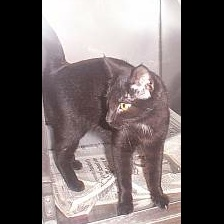

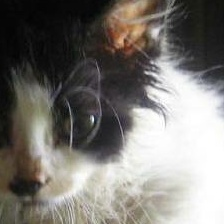

In [23]:
for image_features in train_dataset_parsed.take(2):
  image1 = image_features['image_raw'].numpy()
  display.display(display.Image(data=image1))

In [24]:
validation_dataset_raw = tf.data.TFRecordDataset('/content/tfrecords/validation_data.tfrecords')

image_feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64)  
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

validation_dataset_parsed = validation_dataset_raw.map(_parse_image_function)
validation_dataset_parsed

<MapDataset shapes: {image_raw: (), label: ()}, types: {image_raw: tf.string, label: tf.int64}>

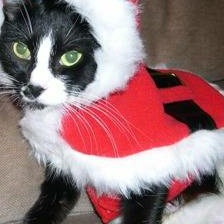

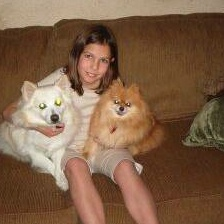

In [25]:
for image_features in validation_dataset_parsed.take(2):
  image1 = image_features['image_raw'].numpy()
  display.display(display.Image(data=image1))

## Decoding tfRecordDataset into numpy arrays

In [26]:
image_inp_array_3d = []
for image in train_dataset_parsed :
  image_tensor = tf.image.decode_jpeg(image['image_raw'], channels=3)
  image_array = image_tensor.numpy()
  image_inp_array_3d.append(image_array)
print(len(image_inp_array_3d))

20000


In [27]:
X_train = np.concatenate([arr[np.newaxis] for arr in image_inp_array_3d])
X_train.shape

(20000, 224, 224, 3)

In [28]:
image_output_array_1d = []
for image in train_dataset_parsed :
  image_array = image['label'].numpy()
  image_output_array_1d.append(image_array)
print(len(image_output_array_1d))

20000


In [29]:
y_train = np.concatenate([arr[np.newaxis] for arr in image_output_array_1d])
y_train=np.reshape(image_output_array_1d,(-1,1))
y_train.shape

(20000, 1)

In [30]:
## Decoding Validation dataset
image_inp_array_3d = []
for image in validation_dataset_parsed :
  image_tensor = tf.image.decode_jpeg(image['image_raw'], channels=3)
  image_array = image_tensor.numpy()
  image_inp_array_3d.append(image_array)
print(len(image_inp_array_3d))

5000


In [31]:
X_valid = np.concatenate([arr[np.newaxis] for arr in image_inp_array_3d])
X_valid.shape

(5000, 224, 224, 3)

In [32]:
image_output_array_1d = []
for image in validation_dataset_parsed :
  #image_tensor = tf.image.decode_jpeg(image['label'])
  image_array = image['label'].numpy()
  image_output_array_1d.append(image_array)
print(len(image_output_array_1d))

5000


In [33]:
y_valid = np.concatenate([arr[np.newaxis] for arr in image_output_array_1d])
y_valid=np.reshape(image_output_array_1d,(-1,1))
y_valid.shape

(5000, 1)

In [34]:
# Converting label data to categorical 
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
print(y_train.shape)
print(y_valid.shape)

(20000, 2)
(5000, 2)


Using TensorFlow backend.


## Creating model to perform image classification

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(224, 224, 3)))  
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))                                                            
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))                          
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))                                                            
model1.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))                          
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))                                                            
model1.add(tf.keras.layers.Flatten())                                                                       
model1.add(tf.keras.layers.Dense(128, activation='relu'))                                                   
model1.add(tf.keras.layers.Dense(2, activation='sigmoid'))      

In [36]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [0]:
from tensorflow import keras
model1.compile(optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history=model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/sample - loss: 10959040394754561872310042624.0000 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 2/10
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 3/10
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 4/10
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 6/10
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.4988
Epoch 7/10
20000/20000 [=====

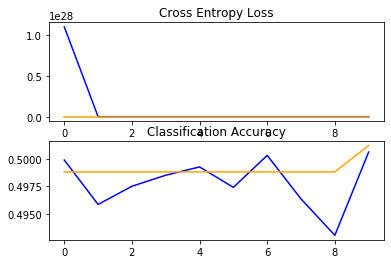

In [39]:
# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='validation')

<p><h3><b><font color = 'DarkBlue'> Processing Test Images </font></b></h3></p>

In [0]:
!ls test1

10000.jpg  11609.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10001.jpg  1160.jpg   1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10002.jpg  11610.jpg  1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10003.jpg  11611.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10004.jpg  11612.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10005.jpg  11613.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10006.jpg  11614.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10007.jpg  11615.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10008.jpg  11616.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10009.jpg  11617.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
1000.jpg   11618.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
10010.jpg  11619.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10011.jpg  1161.jpg   1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10012.jpg  11620.jpg  1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10013.jpg  11621.jpg  19

In [0]:
import os

In [0]:
test_images = os.listdir('test1')

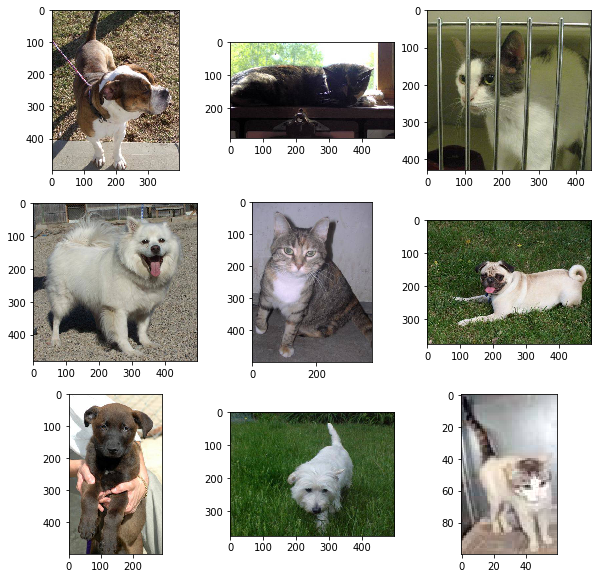

In [0]:
plt.figure(figsize=(10,10))
for i, path in enumerate(test_images[:9],start=1):
    img = tf.keras.preprocessing.image.load_img('/content/test1/'+path)
    plt.subplot(3,3,i)
    plt.imshow(img)
plt.show()